In [1]:
library(ggplot2)

In [2]:
df <- read.csv("/media/igna/Data/CRI_IA/Teacher_to_teacher/time_data.csv")

In [3]:
dim(df)

[1] 676757     10

In [4]:
head(df)

X,author,date_message,forum_name,nb_messages,topic_name,year,month,weekday,day
0,blanc78,2010-02-23 16:46:05,Mathématiques,18 messages,la droite graduée au ce1,2010,2,1,23
1,Yaka...,2010-02-10 17:36:40,Mathématiques,3 517 messages,Symétrie au cm1,2010,2,2,10
2,elodieh,2010-02-21 11:39:24,Mathématiques,73 messages,Symétrie au cm1,2010,2,6,21
3,cdkm,2010-02-21 11:52:19,Mathématiques,662 messages,Symétrie au cm1,2010,2,6,21
4,Stefan,2010-02-21 17:16:09,Mathématiques,2 529 messages,Symétrie au cm1,2010,2,6,21
5,valou44,2010-02-22 11:03:59,Mathématiques,417 messages,Symétrie au cm1,2010,2,0,22


In [5]:
dw <- do.call('rbind',tapply(df$weekday[df$year==2010],df$month[df$year==2010],
                       function(x){
                           data.frame(table(x))}))

In [6]:
dw$month <- rownames(dw)

In [7]:
dw$month <- as.numeric(sapply(strsplit(dw$month,".",fixed=TRUE),function(x){x[1]}))

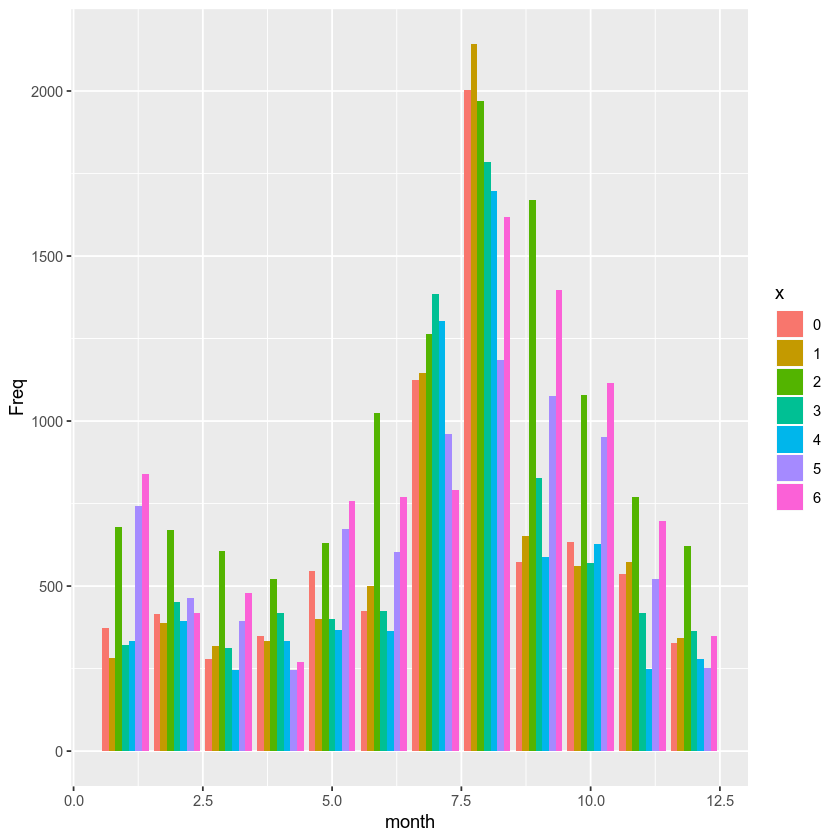

In [8]:
ggplot(data=dw, aes(x=month, fill=x, y=Freq)) +
    geom_bar(stat="identity", position=position_dodge())

In [9]:
df$date_day <- paste(df$year,df$month,df$day)

In [10]:
dde = data.frame(table(df$date_day[df$year==2010]))

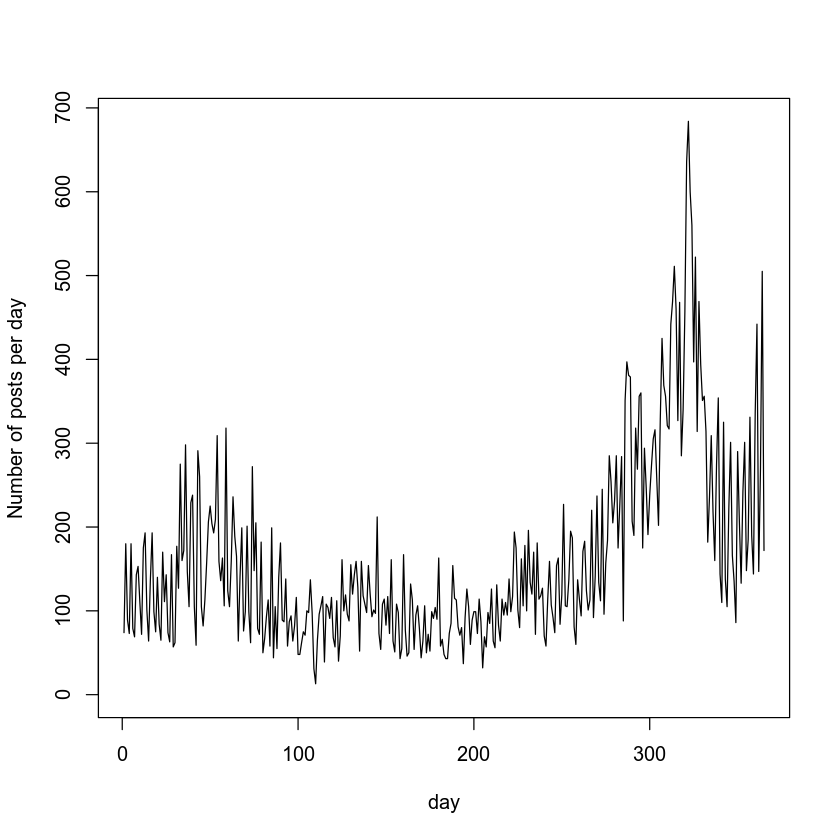

In [11]:
plot(c(1,nrow(dde)), c(0,max(dde$Freq)), type="n", xlab="day",
   ylab="Number of posts per day" )
lines(dde)

## First post of a member

- Was it the creation of a new topic, or not?
- Creation of new topic vs not creation of a new topic vs timerange of activity

In [12]:
df$date_message <- as.POSIXlt(df$date_message)

In [13]:
min(df$date_message[df$author=="--- claire"])

[1] "2012-05-21 15:22:27 CEST"

In [14]:
df[df$author=="--- claire" & df$date_message==min(df$date_message[df$author=="--- claire"]),]

,X,author,date_message,forum_name,nb_messages,topic_name,year,month,weekday,day,date_day
215189,215188,--- claire,2012-05-21 15:22:27,Mathématiques,2 messages,encadrer une fraction par deux entiers consécutifs cm2,2012,5,0,21,2012 5 21


In [15]:
dmin_auth <- df[order(df$author,df$date_message),]

In [16]:
dmin_auth <- dmin_auth[!duplicated(dmin_auth$author),]

In [17]:
dmin_top <- df[order(df$topic,df$date_message),]
dmin_top <- dmin_top[!duplicated(dmin_top$topic),]

In [18]:
head(dmin_top)

,X,author,date_message,forum_name,nb_messages,topic_name,year,month,weekday,day,date_day
387114,387113,cleb72,2010-04-14 17:29:30,Sciences et technologies,238 messages,"- La rotation de la Terre sur elle-même et ses conséquences, la durée",2010,4,2,14,2010 4 14
469598,469597,Lilied94,2006-12-13 16:06:10,"Organiser, préparer et gérer une classe en élémentaire",58 messages,";) Help, please",2006,12,2,13,2006 12 13
436068,436067,48clau,2016-11-09 17:35:56,Sciences et technologies,164 messages,:scratch: Guide du maitre Odysseo sciences CE2,2016,11,2,9,2016 11 9
631012,631011,sofy4,2006-04-03 18:35:16,Thèmes et projets pour l'élémentaire,304 messages,!projet autour du jeu de société,2006,4,0,3,2006 4 3
488584,488583,puce38,2006-08-09 09:37:06,Français,713 messages,? lecture cp: albums école des loisirs,2006,8,2,9,2006 8 9
148419,148418,Soleille,2006-05-20 12:46:26,Musique,4 762 messages,..,2006,5,5,20,2006 5 20


In [19]:
nrow(dmin_auth)

[1] 21559

In [20]:
table(paste(dmin_auth$author,dmin_auth$date_message,dmin_auth$topic_name)%in%
      paste(dmin_top$author,dmin_top$date_message,dmin_top$topic_name))


FALSE  TRUE 
15686  5873 

In [21]:
dmin_auth$Was1stMess_newtopic <- paste(dmin_auth$author,dmin_auth$date_message,dmin_auth$topic_name)%in%
                                 paste(dmin_top$author,dmin_top$date_message,dmin_top$topic_name)

In [22]:
names(dmin_auth)

[1] "X"                   "author"              "date_message"       
 [4] "forum_name"          "nb_messages"         "topic_name"         
 [7] "year"                "month"               "weekday"            
[10] "day"                 "date_day"            "Was1stMess_newtopic"

In [23]:
dmax_auth <- df[order(df$author,-as.numeric(df$date_message)),]
dmax_auth <- dmax_auth[!duplicated(dmax_auth$author),]

In [24]:
dmin_auth$max_date <- dmax_auth$date_message
dmin_auth$max_min <- dmin_auth$max_date - dmin_auth$date_message

In [25]:
head(dmin_auth$max_min)

Time differences in secs
[1]    524096    193972  34009260        90 246554340  12982126

In [26]:
head(as.numeric(dmin_auth$max_min))

[1]    524096    193972  34009260        90 246554340  12982126

In [27]:
#Time_difference in years
dmin_auth$max_min <- as.numeric(dmin_auth$max_min)/(60*60*24*365)

In [28]:
table(dmin_auth$Was1stMess_newtopic[trunc(dmin_auth$max_min)==0])/sum(trunc(dmin_auth$max_min)==0)*100
table(dmin_auth$Was1stMess_newtopic[trunc(dmin_auth$max_min)>0])/sum(trunc(dmin_auth$max_min)>0)*100


   FALSE     TRUE 
73.90988 26.09012 


   FALSE     TRUE 
70.72702 29.27298 

### Was first message posted in Jul-Aug --> staying longer in the forum?

In [29]:
names(dmin_auth)

[1] "X"                   "author"              "date_message"       
 [4] "forum_name"          "nb_messages"         "topic_name"         
 [7] "year"                "month"               "weekday"            
[10] "day"                 "date_day"            "Was1stMess_newtopic"
[13] "max_date"            "max_min"

In [30]:
table((dmin_auth$month%in%c(7,8))[trunc(dmin_auth$max_min)==0])/sum(trunc(dmin_auth$max_min)==0)*100
table((dmin_auth$month%in%c(7,8))[trunc(dmin_auth$max_min)>0])/sum(trunc(dmin_auth$max_min)>0)*100


   FALSE     TRUE 
69.71657 30.28343 


   FALSE     TRUE 
70.23977 29.76023 

In [31]:
head(table(df$author))


    _michel       _Robi    - NouN -  --- claire --anonyme--   -Anonyme- 
          4           8          19           2         119           2 

In [32]:
dmin_auth$tot_nb_messages <- as.numeric(table(df$author))

In [33]:
#mean number of posts per year
ddd <- 
as.numeric(tapply(df$year,df$author,function(x){
    mean(table(as.numeric(x)))
}))

In [34]:
length(ddd)

[1] 21559

In [35]:
dmin_auth$mean_posts_year <- ddd

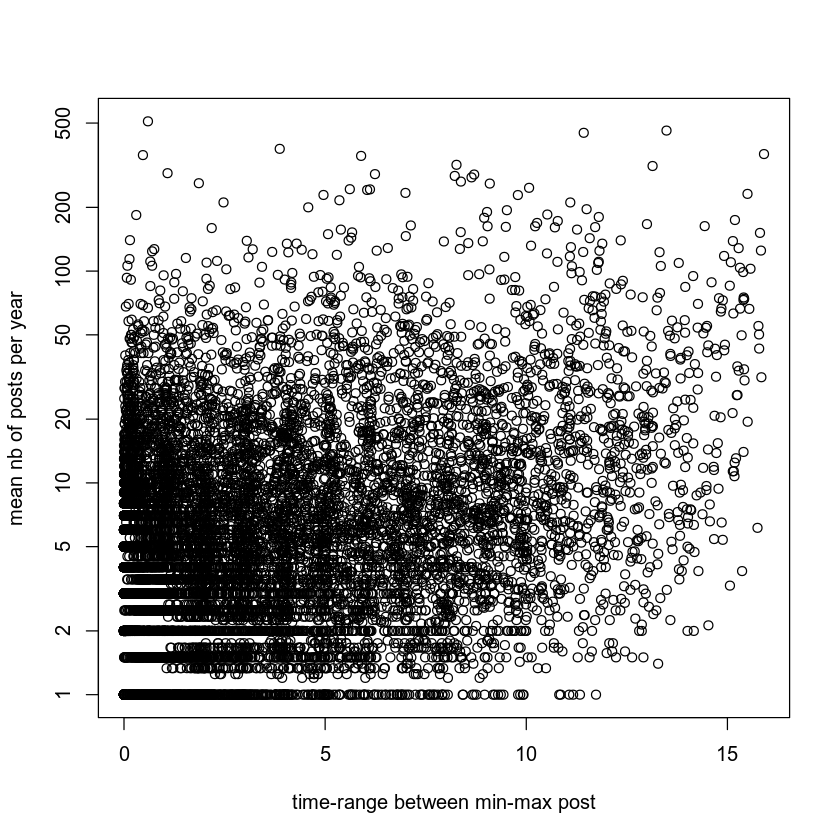

In [36]:
plot(dmin_auth$max_min,dmin_auth$mean_posts_year,log="y",xlab="time-range between min-max post",
     ylab = "mean nb of posts per year")